In [4]:
# Add the path to import module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
os.chdir(module_path)

import features.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
train = pd.read_csv('data/train_2016_v2.csv', parse_dates=['transactiondate'])
train17 = pd.read_csv('data/train_2017.csv', parse_dates=['transactiondate'])

In [7]:
prop = pd.read_csv('data/properties_2016.csv')
prop17 = pd.read_csv('data/properties_2017.csv')

/home/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/peter/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Lines are not aligned

In [18]:
prop.loc[12].parcelid

11116947

In [19]:
prop17.loc[12].parcelid

11114347

In [34]:
parcelid=prop.sort_values(['parcelid'])['parcelid'].reset_index(drop=True)
parcelid17=prop17.sort_values(['parcelid'])['parcelid'].reset_index(drop=True)

In [38]:
(parcelid==parcelid17).all()

True

In [39]:
prop = prop.sort_values(['parcelid']).reset_index(drop=True)
prop17 = prop17.sort_values(['parcelid']).reset_index(drop=True)

In [48]:
eq = prop==prop17
eq[(pd.isnull(prop) & pd.isnull(prop17))] = True

In [52]:
eqpercentage = eq.sum()/len(eq)

<Container object of 58 artists>

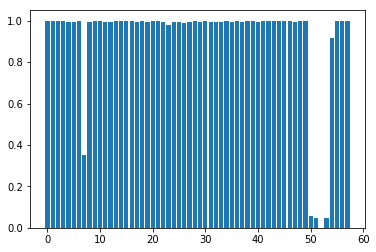

In [64]:
plt.bar(range(len(eqpercentage)), np.array(eqpercentage))

In [62]:
eqpercentage

parcelid                        1.000000
airconditioningtypeid           0.997814
architecturalstyletypeid        1.000000
basementsqft                    1.000000
bathroomcnt                     0.992266
bedroomcnt                      0.992581
buildingclasstypeid             0.999842
buildingqualitytypeid           0.353636
calculatedbathnbr               0.994231
decktypeid                      0.999904
finishedfloor1squarefeet        0.999464
calculatedfinishedsquarefeet    0.993642
finishedsquarefeet12            0.994201
finishedsquarefeet13            1.000000
finishedsquarefeet15            0.998913
finishedsquarefeet50            0.999529
finishedsquarefeet6             0.999818
fips                            0.995187
fireplacecnt                    0.999807
fullbathcnt                     0.994427
garagecarcnt                    0.997075
garagetotalsqft                 0.996925
hashottuborspa                  0.992850
heatingorsystemtypeid           0.978539
latitude        

## Not considering filled missing nans

In [146]:
eq2 = prop==prop17
eq2[pd.isnull(prop)] = True
eqpercentage2 = eq2.sum()/len(eq2)

In [148]:
eqpercentage2

parcelid                        1.000000
airconditioningtypeid           0.999237
architecturalstyletypeid        1.000000
basementsqft                    1.000000
bathroomcnt                     0.996097
bedroomcnt                      0.996413
buildingclasstypeid             0.999897
buildingqualitytypeid           0.355455
calculatedbathnbr               0.998587
decktypeid                      0.999999
finishedfloor1squarefeet        0.999824
calculatedfinishedsquarefeet    0.997872
finishedsquarefeet12            0.998453
finishedsquarefeet13            1.000000
finishedsquarefeet15            0.999333
finishedsquarefeet50            0.999889
finishedsquarefeet6             0.999821
fips                            0.999018
fireplacecnt                    0.999973
fullbathcnt                     0.998784
garagecarcnt                    0.999714
garagetotalsqft                 0.999564
hashottuborspa                  0.993251
heatingorsystemtypeid           0.999752
latitude        

## Builidng quality type is heavily changed

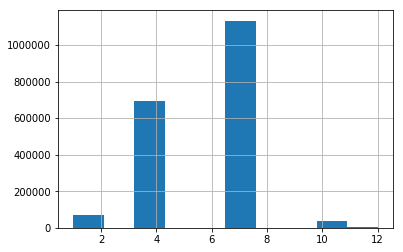

In [65]:
prop['buildingqualitytypeid'].hist()

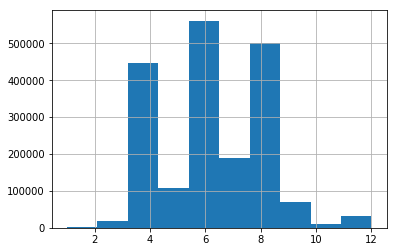

In [66]:
prop17['buildingqualitytypeid'].hist()

## Consider bin them into 4 cats

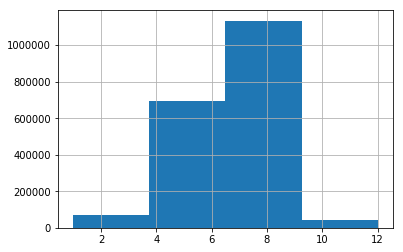

In [71]:
prop['buildingqualitytypeid'].hist(bins=4)

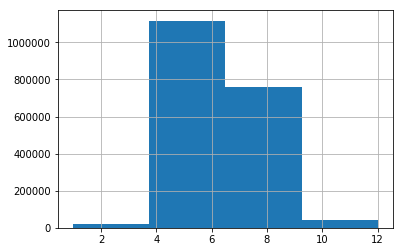

In [72]:
prop17['buildingqualitytypeid'].hist(bins=4)

## Other significantly changed values are

structuretaxvaluedollarcnt      0.056993

taxvaluedollarcnt               0.046655

assessmentyear                  0.001234

landtaxvaluedollarcnt           0.048303

In [81]:
prop['structuretaxvaluedollarcnt'].describe()

count    2.930235e+06
mean     1.708836e+05
std      4.020683e+05
min      1.000000e+00
25%      7.480000e+04
50%      1.225900e+05
75%      1.968890e+05
max      2.514860e+08
Name: structuretaxvaluedollarcnt, dtype: float64

In [78]:
prop17['structuretaxvaluedollarcnt'].describe()

count    2.938753e+06
mean     1.781429e+05
std      4.600503e+05
min      1.000000e+00
25%      7.766600e+04
50%      1.270660e+05
75%      2.040000e+05
max      2.553212e+08
Name: structuretaxvaluedollarcnt, dtype: float64

## The distribution is similar, though mean (price) increases.

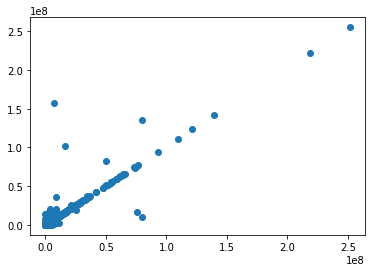

In [79]:
plt.scatter(x=prop['structuretaxvaluedollarcnt'], y=prop17['structuretaxvaluedollarcnt'])

In [82]:
structure_tax_ratio=prop['structuretaxvaluedollarcnt']/prop17['structuretaxvaluedollarcnt']

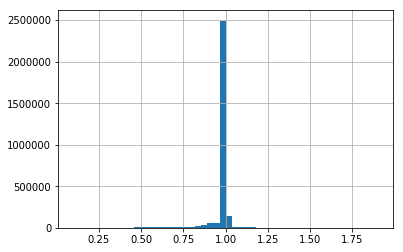

In [94]:
structure_tax_ratio.clip(0.1,1.9).hist(bins=50)

In [95]:
structure_tax_ratio.describe()

count    2.927152e+06
mean     9.938613e-01
std      1.129762e+01
min      8.333333e-05
25%      9.849803e-01
50%      9.849826e-01
75%      9.849870e-01
max      1.228500e+04
Name: structuretaxvaluedollarcnt, dtype: float64

In [98]:
prop.loc[structure_tax_ratio.idxmax()]

parcelid                           12401972
airconditioningtypeid                   NaN
architecturalstyletypeid                NaN
basementsqft                            NaN
bathroomcnt                               0
bedroomcnt                                0
buildingclasstypeid                     NaN
buildingqualitytypeid                   NaN
calculatedbathnbr                       NaN
decktypeid                              NaN
finishedfloor1squarefeet                NaN
calculatedfinishedsquarefeet           1429
finishedsquarefeet12                    NaN
finishedsquarefeet13                    NaN
finishedsquarefeet15                   1429
finishedsquarefeet50                    NaN
finishedsquarefeet6                     NaN
fips                                   6037
fireplacecnt                            NaN
fullbathcnt                             NaN
garagecarcnt                            NaN
garagetotalsqft                         NaN
hashottuborspa                  

In [100]:
prop17.loc[structure_tax_ratio.idxmax()]

parcelid                           12401972
airconditioningtypeid                   NaN
architecturalstyletypeid                NaN
basementsqft                            NaN
bathroomcnt                               0
bedroomcnt                                0
buildingclasstypeid                     NaN
buildingqualitytypeid                   NaN
calculatedbathnbr                       NaN
decktypeid                              NaN
finishedfloor1squarefeet                NaN
calculatedfinishedsquarefeet           1429
finishedsquarefeet12                    NaN
finishedsquarefeet13                    NaN
finishedsquarefeet15                   1429
finishedsquarefeet50                    NaN
finishedsquarefeet6                     NaN
fips                                   6037
fireplacecnt                            NaN
fullbathcnt                             NaN
garagecarcnt                            NaN
garagetotalsqft                         NaN
hashottuborspa                  

In [143]:
pd.DataFrame([prop[structure_tax_ratio < 0.8]['structuretaxvaluedollarcnt'], prop17[structure_tax_ratio < 0.8]['structuretaxvaluedollarcnt']])

,30,54,76,107,111,148,161,175,179,231,...,2975775,2975804,2975971,2975978,2976008,2976016,2976244,2976308,2976517,2978014
structuretaxvaluedollarcnt,254691.0,55871.0,174742.0,80400.0,197636.0,139597.0,137229.0,180161.0,120332.0,66073.0,...,28700.0,31700.0,24400.0,24300.0,21100.0,18000.0,10811.0,16300.0,10100.0,207699.0
structuretaxvaluedollarcnt,344938.0,208126.0,274800.0,253812.0,299092.0,175000.0,253705.0,293508.0,356792.0,120814.0,...,56336.0,70300.0,32500.0,32700.0,57700.0,25500.0,15200.0,30600.0,15300.0,311000.0


In [102]:
train['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [103]:
train17['logerror'].describe()

count    77613.000000
mean         0.016755
std          0.170887
min         -4.655420
25%         -0.024325
50%          0.006670
75%          0.039295
max          5.262999
Name: logerror, dtype: float64

## Target mean is slightly larger, but median/quantiles are close. Is it possible there are more outliers?

In [120]:
[train[train['logerror']>train['logerror'].quantile(pct)]['logerror'].mean() for pct in [0.99, 0.999, 0.9999, 0.99999]]

[0.914866555924695, 2.3861868131868134, 3.7664999999999997, 4.737]

In [121]:
[train17[train17['logerror']>train17['logerror'].quantile(pct)]['logerror'].mean() for pct in [0.99, 0.999, 0.9999, 0.99999]]

[1.0797556059286468, 2.5067154592656418, 3.4066735426362498, 5.2629986498]

In [122]:
[train[train['logerror']<train['logerror'].quantile(pct)]['logerror'].mean() for pct in [0.01, 0.001, 0.0001, 0.00001]]

[-0.6897311457174631, -1.9634111111111103, -3.2079999999999997, nan]

In [123]:
[train17[train17['logerror']<train17['logerror'].quantile(pct)]['logerror'].mean() for pct in [0.01, 0.001, 0.0001, 0.00001]]

[-0.6328866809586338, -1.8125962040529475, -3.15315847991, -4.65542037764]

In [138]:
train[(train['logerror']<train['logerror'].quantile(0.99)) & (train['logerror']>train['logerror'].quantile(0.01))].describe()

,parcelid,logerror
count,8.846500e+04,88465.000000
mean,1.299285e+07,0.009393
std,2.519288e+06,0.083386
min,1.071174e+07,-0.341100
25%,1.155872e+07,-0.025300
50%,1.255725e+07,0.006000
75%,1.423440e+07,0.038300
max,1.629608e+08,0.463700


In [139]:
train17[(train17['logerror']<train17['logerror'].quantile(0.99)) & (train17['logerror']>train17['logerror'].quantile(0.01))].describe()

,parcelid,logerror
count,7.605900e+04,76059.000000
mean,1.301192e+07,0.012532
std,3.494223e+06,0.085997
min,1.071186e+07,-0.319816
25%,1.153702e+07,-0.023508
50%,1.253767e+07,0.006670
75%,1.421532e+07,0.038338
max,1.676893e+08,0.534074


## So generally its more likely to overestimate in 2017